MAE: 8.86
RMSE: 10.90


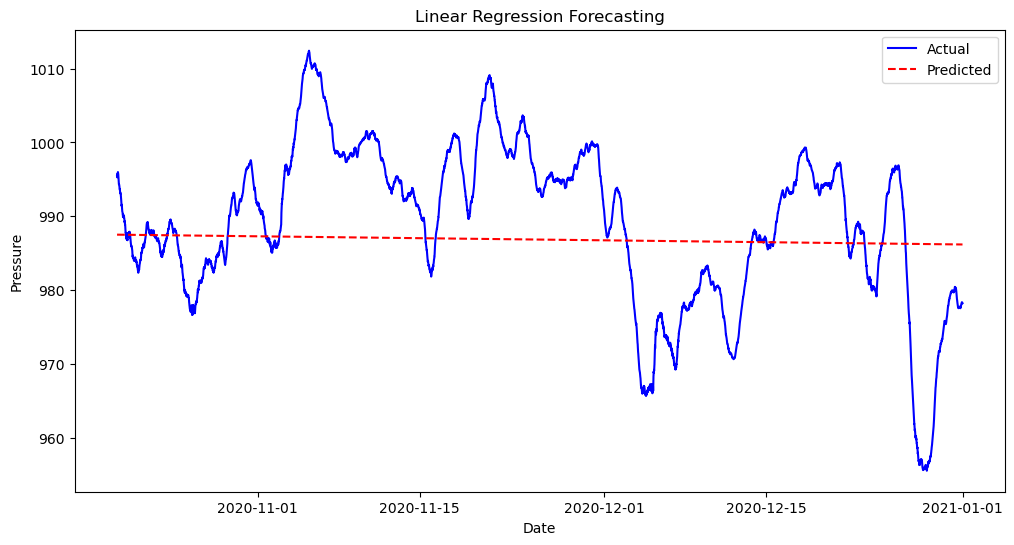

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the dataset
df = pd.read_csv(r"C:\Users\harsh\Downloads\cleaned_weather.csv", parse_dates=['date'], index_col='date')

# Selecting a time series column 
df['Time_Index'] = np.arange(len(df))  # Create a numerical index for time
X = df[['Time_Index']]  # Features (Time)
y = df['p']  # Target variable 

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

# Plot actual vs predicted values
plt.figure(figsize=(12,6))
plt.plot(df.index[len(X_train):], y_test, label='Actual', color='blue')
plt.plot(df.index[len(X_train):], y_pred, label='Predicted', color='red', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Pressure')
plt.title('Linear Regression Forecasting')
plt.legend()
plt.show()
